In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [43]:
def load_routes(version="newest"):
    saved_routes = os.listdir("saved_routes")
    if version == "newest":
        version = sorted(saved_routes)[-1]
    with open(os.path.join('saved_routes',version), 'r') as f:
        # write the dictionary to the file in JSON format
        routes = json.load(f)
    return routes

def load_hold_setup(version="newest"):
    saved_hold_setups = os.listdir("saved_hold_setups")
    if version == "newest":
        version = sorted(saved_hold_setups)[-1]
    with open(os.path.join('saved_hold_setups',version), 'r') as f:
        # write the dictionary to the file in JSON format
        home_wall = json.load(f)
    return home_wall

def get_coordinates():
    h_hole_distance = [15]+[20]*11
    h_cumulative_hole_distance = [np.sum(h_hole_distance[:i+1]) for i in range(len(h_hole_distance))]
    v_hole_distance = [5]+[20]*14
    v_cumulative_hole_distance = [np.sum(v_hole_distance[:i+1]) for i in range(len(v_hole_distance))]
    return h_cumulative_hole_distance, v_cumulative_hole_distance

def plot_background(ax):
    ax.axis("off")
    # wandpanele
    for base_h in [0,150]:
        ax.plot([0,250,250,0,0],np.array([0,0,150,150,0])+base_h,color="k",linewidth=1.5,zorder=1)
    # doka tafeln einzeln
    for base_h in [0,50,100,150,200,250]:
        ax.plot([0,250,250,0,0],np.array([0,0,50,50,0])+base_h,color="grey",linewidth=.75,zorder=0)
    h_cumulative_hole_distance, v_cumulative_hole_distance = get_coordinates()
    # coordinaten
    alphabeth = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for i,h in enumerate(h_cumulative_hole_distance):
        ax.text(h,310,alphabeth[i],va="center",ha="center")
        ax.text(h,-10,alphabeth[i],va="center",ha="center")
    for i,v in enumerate(v_cumulative_hole_distance):
        ax.text(-10,v,f"{i+1}",va="center",ha="center")
        ax.text(260,v,f"{i+1}",va="center",ha="center")
        
def plot_hold(ax,hold):
#    print(hold)
    ax.scatter(*hold["plot_coords"],color=hold["plot_color"],s=hold["plot_size"],edgecolor="k",linewidth=1)

def plot_all_holds(ax,holds):
    for hold_coords, hold in holds.items():
        plot_hold(ax,hold)

In [44]:
home_wall = load_hold_setup()
routes = load_routes()

## Plot Home Wall

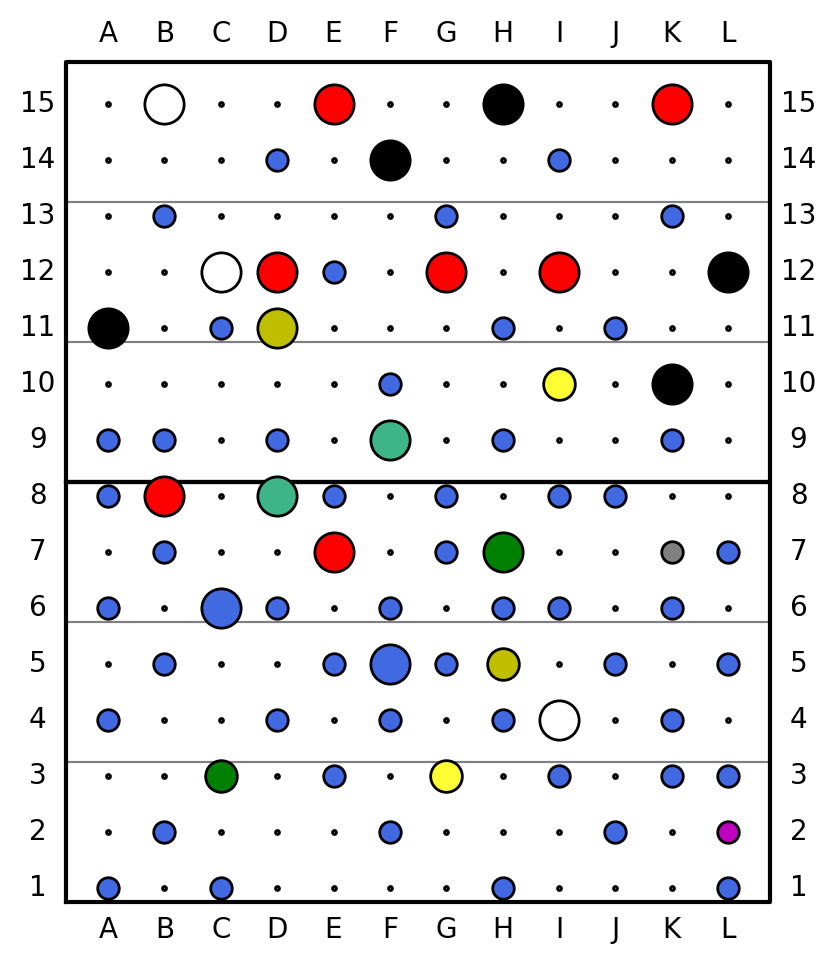

In [45]:
fig = plt.figure(dpi=200,figsize=(5,6))
ax = fig.add_subplot(111)
plot_background(ax)
plot_all_holds(ax,home_wall)



plt.show()

In [24]:
hold = home_wall["1A"]
hold

{'hold_mounted': True,
 'hold_color': 'b',
 'hold_size': 'S',
 'plot_coords': [15.0, 5.0],
 'plot_color': '#4169E1',
 'plot_size': 60}

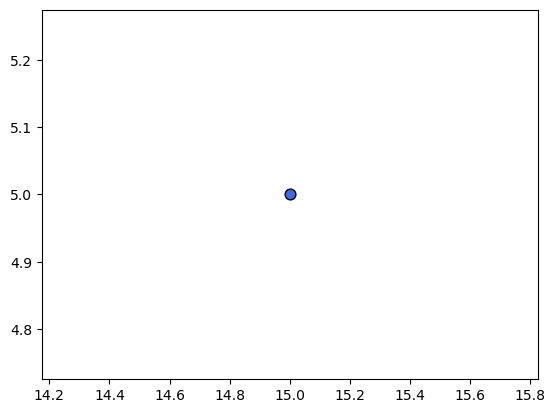